## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей **кредитного скоринга (оценка надёжности клиента)**. Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [3]:
import pandas as pd
import numpy as np

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [4]:
data.isnull().sum()
# нет пропусков в данных

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

**количественные**: duration, amount, age

**бинарные**: credit_risk, telephone, people_liable,            foreign_worker               

**порядковые**: employment_duration, present_residence, number_credits, job (есть некая иерархия), installment_rate



**категориальные**: status (не можем упорядочить из-за "no checking account"), credit_history, purpose, savings (не можем упорядочить из-за "unknown/no savings account"), personal_status_sex, other_debtors, property, other_installment_plans, housing



In [5]:
# определим бинарные
data.nunique().sort_values()

credit_risk                  2
telephone                    2
people_liable                2
foreign_worker               2
housing                      3
other_installment_plans      3
other_debtors                3
job                          4
number_credits               4
property                     4
status                       4
installment_rate             4
personal_status_sex          4
present_residence            4
employment_duration          5
savings                      5
credit_history               5
purpose                     10
duration                    33
age                         53
amount                     923
dtype: int64

In [ ]:
# определим количественные
data.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


In [ ]:
# определим порядковые - можно упорядочить о меньшего к большему, от менее престижного к более
print(set(data["employment_duration"]))
print(set(data["present_residence"]))
print(set(data["number_credits"]))
print(set(data["job"]))
print(set(data["installment_rate"]))


{'>= 7 yrs', '4 <= ... < 7 yrs', '1 <= ... < 4 yrs', 'unemployed', '< 1 yr'}
{'4 <= ... < 7 yrs', '1 <= ... < 4 yrs', '< 1 yr', '>= 7 yrs'}
{'1', '2-3', '4-5', '>= 6'}
{'unemployed/unskilled - non-resident', 'unskilled - resident', 'manager/self-empl./highly qualif. employee', 'skilled employee/official'}
{'25 <= ... < 35', '< 20', '>= 35', '20 <= ... < 25'}


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [18]:
pd.DataFrame(np.around(data.groupby("purpose")["amount"].mean(), 2))

,amount
purpose,
business,8209.33
car (new),5370.22
car (used),3066.98
domestic appliances,2728.09
furniture/equipment,2487.69
others,3062.95
radio/television,1498.00
repairs,3180.40
retraining,4158.04


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [19]:
data.shape

(1000, 21)

In [27]:
print('Процент клиентов моложе 30 лет, снимающих жилье: ',
      np.around(data[(data.age < 30)&(data.housing == 'rent')].shape[0] / data[(data.age < 30)].shape[0] * 100, 2), "%", sep = '')

Процент клиентов моложе 30 лет, снимающих жилье: 66.67%


In [28]:
print('Процент клиентов старше 40 лет, снимающих жилье: ',
      np.around(data[(data.age > 40)&(data.housing == 'rent')].shape[0] / data[(data.age > 40)].shape[0] * 100, 2), "%", sep = '')

Процент клиентов старше 40 лет, снимающих жилье: 68.01%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [30]:
# какие есть варианты по количеству кредитов в исходной таблице?
set(data['number_credits'])

{'1', '2-3', '4-5', '>= 6'}

In [ ]:
print(data.loc[(data['foreign_worker'] == "yes")&(data["number_credits"] != "2-3")&(data["number_credits"] != "1")].shape[0])

1


In [32]:
print('Количество иностранных клиентов (foreign_worker), имеющих больше 3 кредитов:',
      data[(data['foreign_worker'] == "yes")&(data["number_credits"] != "2-3")&(data["number_credits"] != "1")].shape[0])

Количество иностранных клиентов (foreign_worker), имеющих больше 3 кредитов: 1


### Задание 6 (1 балл)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте **график функций $sin(x)$ и $cos(x)$** от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой.

Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

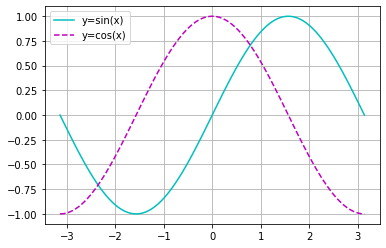

In [ ]:
# reference

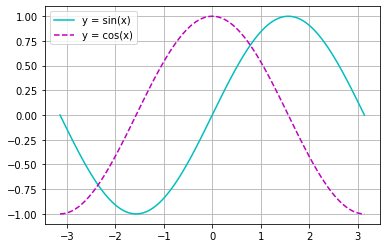

In [ ]:
x = np.linspace(-np.pi, np.pi, 100)
y_1 = np.sin(x)
y_2 = np.cos(x)

plt.plot(x, y_1, label="y = sin(x)", color='c')
plt.plot(x, y_2, label="y = cos(x)", linestyle='--', color='m')
plt.legend()
plt.grid()

plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [37]:
pd.DataFrame(data.groupby(['credit_risk', 'status']).size())

0
credit_risk status                                         
bad         ... < 0 DM                                  105
            ... >= 200 DM / salary for at least 1 year   46
            0<= ... < 200 DM                             14
            no checking account                         135
good        ... < 0 DM                                  164
            ... >= 200 DM / salary for at least 1 year  348
            0<= ... < 200 DM                             49
            no checking account                         139

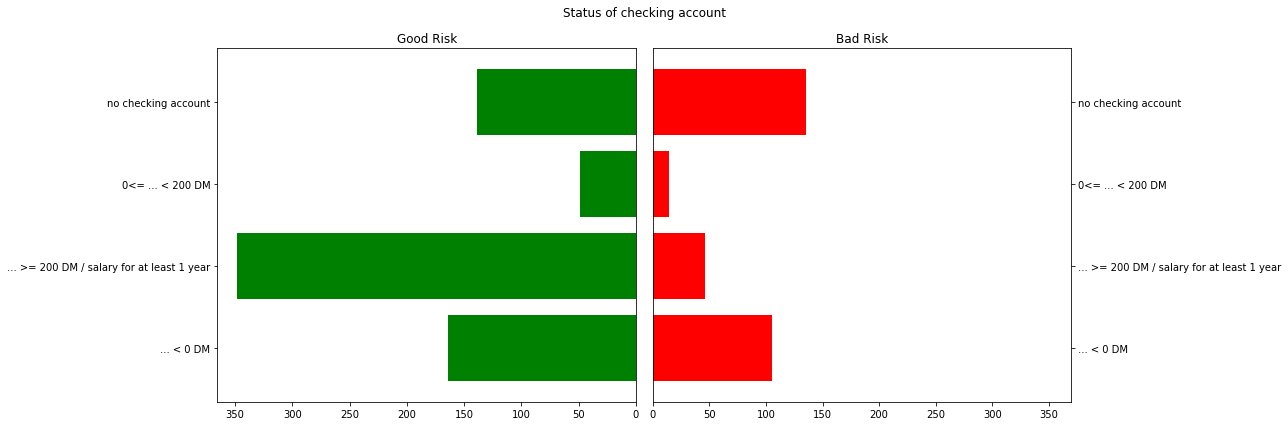

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))
fig.suptitle('Status of checking account')

good = data.groupby(['credit_risk', 'status']).size()['good']
good.plot.barh(color='g', width=0.8, ax=ax[0])
ax[0].invert_xaxis() # разворачиваем
ax[0].set_title('Good Risk')
ax[0].set_ylabel('') # убираем название оси ординат

bad = data.groupby(['credit_risk', 'status']).size()['bad']
bad.plot.barh(color='r', width=0.8, ax=ax[1])
ax[1].set_title('Bad Risk')
ax[1].yaxis.tick_right() # перекидываем значения "статуса" с левой стороны на правую
ax[1].set_xlim(0, 370) # введем размерность как на левом графике (так как именно на нем наиболее значение), чтоб симметрия выполнялась
ax[1].set_ylabel('') # убираем название оси ординат

fig.tight_layout() #автоматически корректируем subplot параметры так, чтобы subplot(s) вписывался(лись) в область рисунка
plt.show()

**Комментарий с выводами:**

лучшим кредитным риском (наибольшим в гистограмме "Good Risk") обладают клиенты, обладающие статусом **"... >= 200 DM / salary for at least 1 year"**, что логично, ведь они имеют достаточные средства для выплаты кредита

когда наихудшим кредитным риском (наибольшее значение в гистограмме "Bad risk") обладают клиенты, **не имеющие checking account** в банке, что понятно: меньше информации - меньше доверия банка ввиду высокого риска по неуплате


### Задание 8  (0.5 балла)

In [5]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

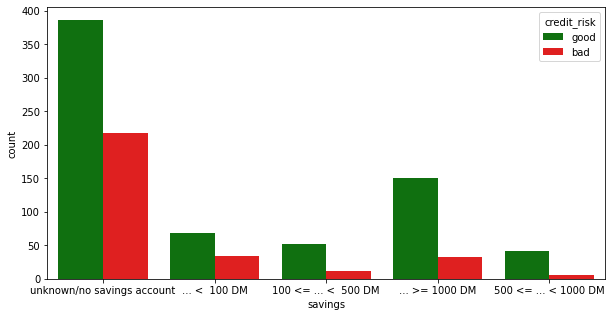

In [ ]:
# reference

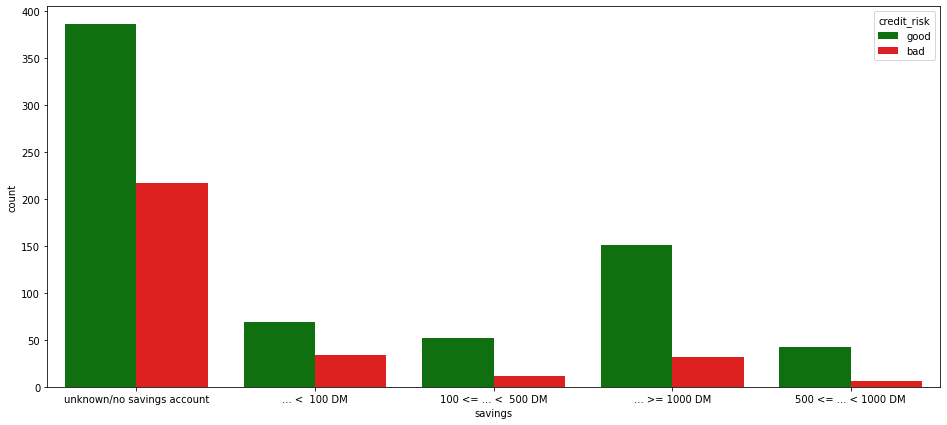

In [ ]:
sns.countplot(x='savings', hue='credit_risk', data=data, palette = ["g", "r"])
fig = plt.gcf()
fig.set_size_inches(16, 7)

plt.show()

**Комментарий с выводами:**

С ростом средств на сберегательном счете разница между уровнем положительного риска и отрицательно **пропорционально увеличивается** в пользу положительного (он выше, а отрицательный ниже) - чем больше денег на счету у заявителя, тем банк более вероятно одобрит кредит, руководствуясь высоким показателем "good risk" и низким "bad risk"


Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? - с помощью **seaborn** - код короче

А с точки зрения восприятия результата? - **также 2 способ** - легче соотносить столбцы, которые расположены рядом, а не напротив друг друга

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

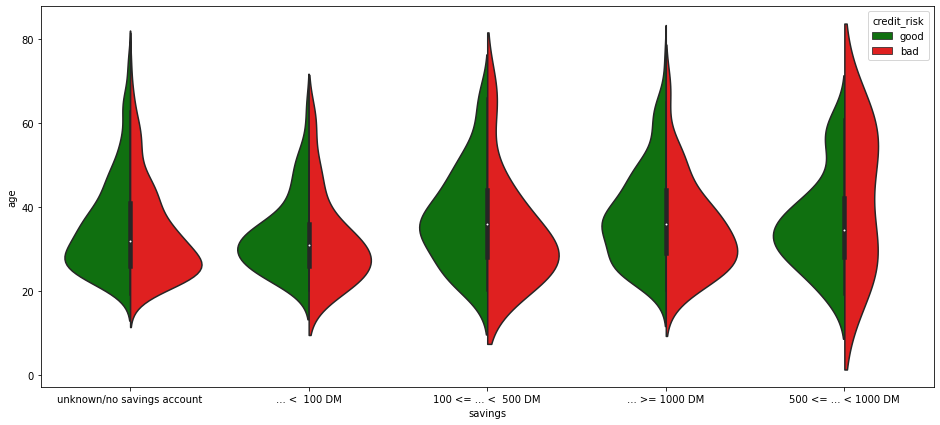

In [ ]:
sns.violinplot(data=data, x='savings', y = "age", hue='credit_risk', palette = ["g", "r"], split=True)
fig = plt.gcf()
fig.set_size_inches(16, 7)

plt.show()

**Комментарий с выводами**

По мере увеличения объема сбережений вершина купола, отнесенного к "good risk", смещается вверх - это говорит о том, что более высокий уровень сбережений достигается в более старшем возрасте

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

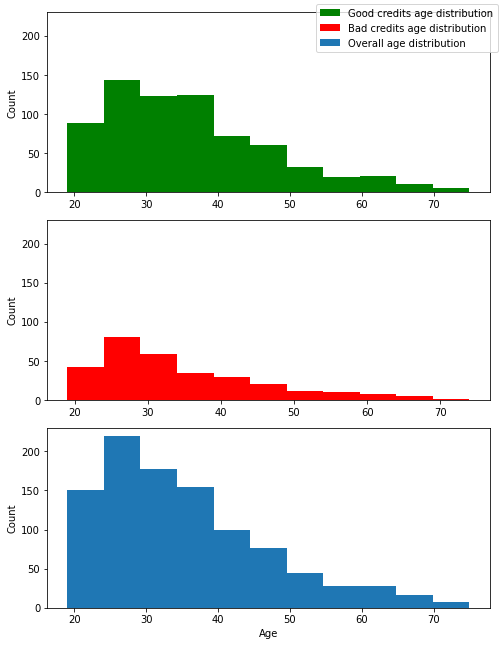

In [ ]:
# reference

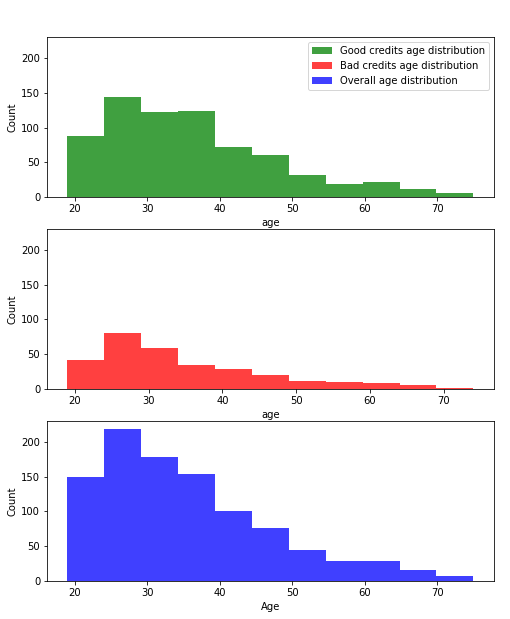

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(8,10))
# установим видимые ограничения для y-axis, основываясь на наибольшем значении из графика №3
ax[0].set_ylim(0, 230)
ax[1].set_ylim(0, 230)
ax[2].set_ylim(0, 230)

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('Age')

sns.histplot(data[(data['credit_risk'] == 'good')]['age'],  ax=ax[0], bins=11, edgecolor='none', color='green', label = 'Good credits age distribution')
sns.histplot(data[(data['credit_risk'] == 'bad')]['age'], ax=ax[1], bins=11, edgecolor='none', color='red', label = 'Bad credits age distribution')
sns.histplot(data["age"], ax=ax[2], bins=11, edgecolor='none', color='blue', label = 'Overall age distribution')

fig.legend(loc=(0.603, 0.855))
plt.show()

**Комментарий с выводами**

В совокупности группа клинетов возрастной группы от **25 - 40** является доминирующей, что сказывается на чистоте из кредитования и сосредоточенности наибольших значений по показателям "good risk" и "bad risk" в этом интервале

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

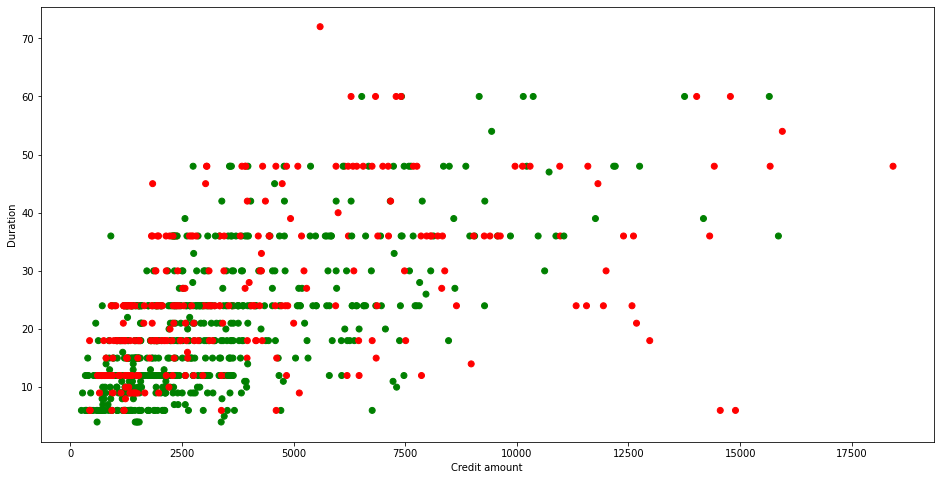

In [ ]:
# reference

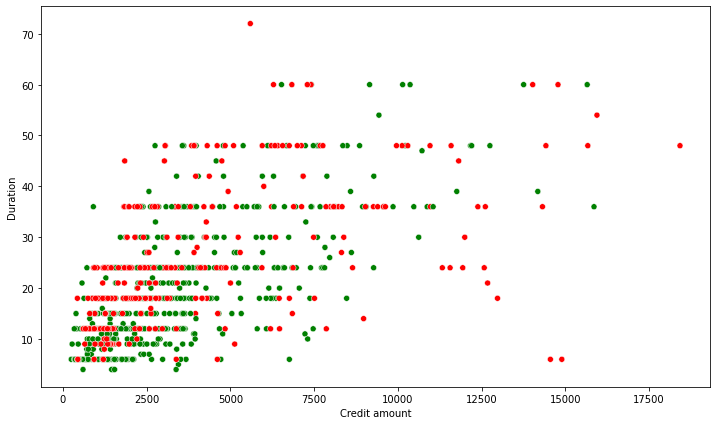

In [ ]:
sns.scatterplot(x="amount", y="duration", hue= "credit_risk", palette = ["g", "r"], data=data, legend = False)
plt.xlabel('Credit amount')
plt.ylabel('Duration')

fig = plt.gcf()
fig.set_size_inches(12, 7)

plt.show()

**Комментарий с выводами**

По графику можно говорить о том, что люди чаще предпочитаю брать небольшой кредит (до 5000 DM) на короткий срок (до 30 месяцев)

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

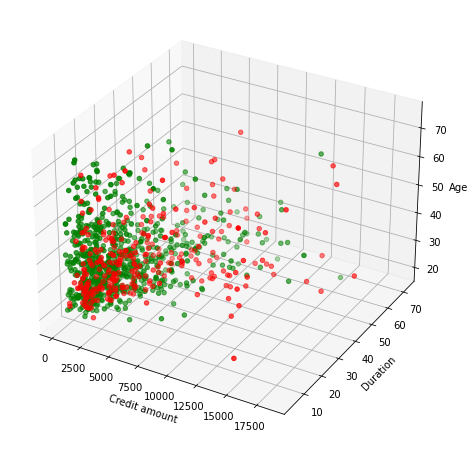

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = data['amount']
y = data['duration']
z = data['age']

ax.scatter(data[(data['credit_risk'] == 'bad')]['amount'], data[(data['credit_risk'] == 'bad')]['duration'], data[(data['credit_risk'] == 'bad')]['age'], color = "red")
ax.scatter(data[(data['credit_risk'] == 'good')]['amount'], data[(data['credit_risk'] == 'good')]['duration'], data[(data['credit_risk'] == 'good')]['age'], color = "green")

ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

fig = plt.gcf()
fig.set_size_inches(11, 8)

plt.show()

**Комментарий с выводами**

По графику видно, что люди чаще предпочитаю брать небольшой кредит (до 5000 DM) на короткий срок (до 30 месяцев) - большинство положительных кейсов сосредаточено в возрастной категории от 25-40 лет, могу предположить, что происходит по причине того, что в данный период люди наиболее продуктивны, что означает, что они в силах выплатить кредит

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

**бинарные**: credit_risk, telephone, people_liable, foreign_worker

In [6]:
data["credit_risk"] = data["credit_risk"].apply(lambda x: 0 if x == "bad" else 1)
data["telephone"] = data["telephone"].apply(lambda x: 0 if x == "no" else 1)
data["people_liable"] = data["people_liable"].apply(lambda x: 0 if x == "0 to 2" else 1)
data["foreign_worker"] = data["foreign_worker"].apply(lambda x: 0 if x == "no" else 1)

**порядковые**: employment_duration, present_residence, number_credits, job (есть некая иерархия), installment_rate

**категориальные**: status (не можем упорядочить из-за "no checking account"), credit_history, purpose, savings (не можем упорядочить из-за "unknown/no savings account"), personal_status_sex, other_debtors, property, other_installment_plans, housing

In [7]:
# определим порядковые - можно упорядочить о меньшего к большему, от менее престижного к более
print(set(data["employment_duration"]))
print(set(data["present_residence"]))
print(set(data["number_credits"]))
print(set(data["job"]))
print(set(data["installment_rate"]))

{'1 <= ... < 4 yrs', '>= 7 yrs', 'unemployed', '< 1 yr', '4 <= ... < 7 yrs'}
{'< 1 yr', '>= 7 yrs', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs'}
{'2-3', '1', '4-5', '>= 6'}
{'skilled employee/official', 'manager/self-empl./highly qualif. employee', 'unskilled - resident', 'unemployed/unskilled - non-resident'}
{'25 <= ... < 35', '20 <= ... < 25', '>= 35', '< 20'}


In [8]:
data["employment_duration"] = data["employment_duration"].map({'unemployed': 0,
                                                              '< 1 yr': 1,
                                                              '1 <= ... < 4 yrs': 2,
                                                              '4 <= ... < 7 yrs': 3,
                                                              '>= 7 yrs': 4})
data["present_residence"] = data["present_residence"].map({'< 1 yr': 0,
                                                              '1 <= ... < 4 yrs': 1,
                                                              '4 <= ... < 7 yrs': 2,
                                                              '>= 7 yrs': 3})
data["number_credits"] = data["number_credits"].map({'1': 0,
                                                     '2-3': 1,
                                                     '4-5': 2,
                                                     '>= 6': 3})
data["job"] = data["job"].map({'unemployed/unskilled - non-resident': 0,
                               'unskilled - resident': 1,
                               'skilled employee/official': 2,
                               'manager/self-empl./highly qualif. employee': 3})
data["installment_rate"] = data["installment_rate"].map({'< 20': 0,
                                                         '20 <= ... < 25': 1,
                                                         '25 <= ... < 35': 2,
                                                         '>= 35': 3})
data = data.drop(["status", "credit_history", "purpose", "savings", "personal_status_sex", "other_debtors", "property", "other_installment_plans", "housing"], axis=1)
data

,duration,amount,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,1,0,3,21,0,2,0,0,0,1
1,9,2799,2,2,1,36,1,2,1,0,0,1
2,12,841,3,2,3,23,0,1,0,0,0,1
3,12,2122,2,1,1,39,1,1,1,0,1,1
4,12,2171,2,0,3,38,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,2,2,3,21,0,1,1,0,0,0
996,24,2303,4,0,0,45,0,2,0,0,0,0
997,21,12680,4,0,3,30,0,3,0,1,0,0
998,12,6468,0,2,0,52,0,3,0,1,0,0
